In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv('/Users/adonismaomao/Data sets/ft_us_bank/data.csv')

/Users/adonismaomao/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index([u'id', u'member_id', u'loan_amnt', u'funded_amnt', u'funded_amnt_inv',
       u'term', u'int_rate', u'installment', u'grade', u'sub_grade',
       u'emp_title', u'emp_length', u'home_ownership', u'annual_inc',
       u'verification_status', u'issue_d', u'loan_status', u'pymnt_plan',
       u'url', u'desc', u'purpose', u'title', u'zip_code', u'addr_state',
       u'dti', u'delinq_2yrs', u'earliest_cr_line', u'inq_last_6mths',
       u'mths_since_last_delinq', u'mths_since_last_record', u'open_acc',
       u'pub_rec', u'revol_bal', u'revol_util', u'total_acc',
       u'initial_list_status', u'out_prncp', u'out_prncp_inv', u'total_pymnt',
       u'total_pymnt_inv', u'total_rec_prncp', u'total_rec_int',
       u'total_rec_late_fee', u'recoveries', u'collection_recovery_fee',
       u'last_pymnt_d', u'last_pymnt_amnt', u'next_pymnt_d',
       u'last_credit_pull_d', u'collections_12_mths_ex_med',
       u'mths_since_last_major_derog', u'policy_code', u'application_type',
       u'annu

In [5]:
def plot_correlation_matrix(df):
    """Takes a pandas dataframe as input"""
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
    
    cax = ax.matshow(df.corr())

    ticks = list(range(len(df.columns)))
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)

    ax.set_xticklabels(df.columns, rotation=20, horizontalalignment='left')
    ax.set_yticklabels(df.columns)

    plt.tight_layout()
    plt.show()

/Users/adonismaomao/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


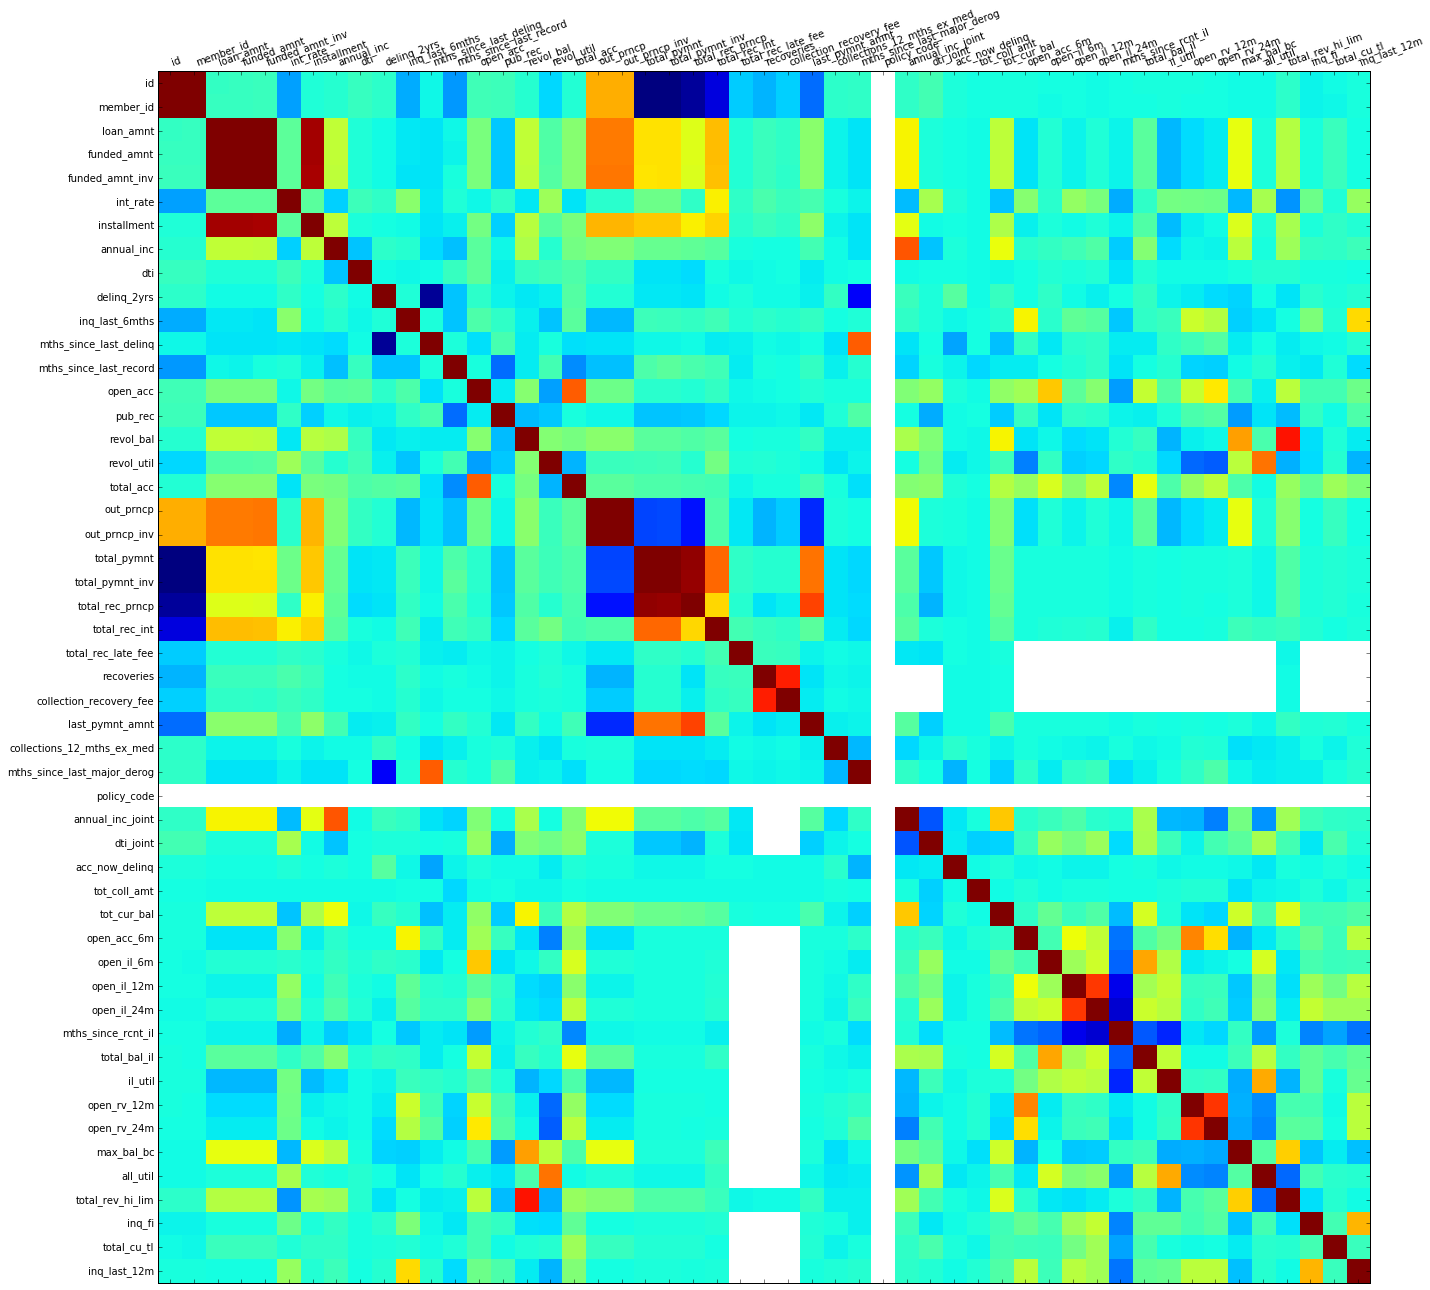

In [6]:
plot_correlation_matrix(df[df.describe().columns.tolist()])

In [7]:
df.iloc[0]

id                                                                       1077501
member_id                                                                1296599
loan_amnt                                                                   5000
funded_amnt                                                                 5000
funded_amnt_inv                                                             4975
term                                                                   36 months
int_rate                                                                   10.65
installment                                                               162.87
grade                                                                          B
sub_grade                                                                     B2
emp_title                                                                    NaN
emp_length                                                             10+ years
home_ownership              

In [8]:
num_fea = df.describe().columns.tolist()
print num_fea

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


In [9]:
# to see if member_ids are unique
len(set(df.member_id))==len(df.member_id)

True

In [10]:
# Looking at the type of grades being assigned
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [11]:
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [12]:
sum(df.loan_amnt), sum(df.funded_amnt), sum(df.funded_amnt_inv)

(13093511950.0, 13081632625.0, 13046658141.926006)

In [13]:
#Last total payment amount received - amount of loan 
sum(df.last_pymnt_amnt)-sum(df.loan_amnt)

-11173094604.521759

In [14]:
#Payments received to date - total amount funded
sum(df.total_pymnt)-sum(df.funded_amnt)

-6374088561.2964535

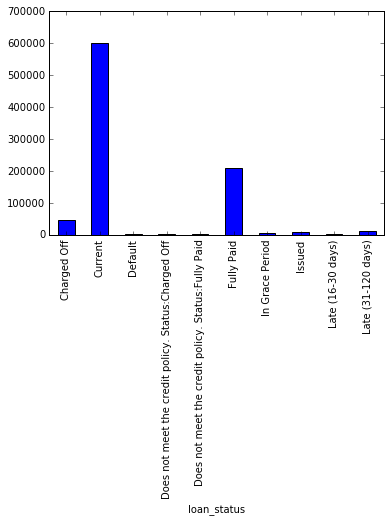

In [15]:
df.groupby('loan_status').count()['id'].plot.bar()

In [16]:
df[df.loan_status.isin(['Charged Off', 'Does not meet the credit policy. Status:Charged Off'])].count()['id']/float(len(df[df.loan_status!='Current']))

0.16109593837535013

In [17]:
df.groupby('loan_status').sum()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
loan_status,,,,,,,,,,,,,,,,,,,,,
Charged Off,497420626300,555815299821,6.586432e+08,6.565824e+08,6.511379e+08,7.246852e+05,1.994475e+07,2.944972e+09,832704.65,12491.0,...,NaN,NaN,NaN,NaN,NaN,NaN,9.289387e+08,NaN,NaN,NaN
Current,24460186371227,26283121274576,9.172243e+09,9.171215e+09,9.167090e+09,7.790492e+06,2.670854e+08,4.582716e+10,11302489.18,203055.0,...,479914789.0,820611.6,17755.0,38628.0,76813314.0,802405.8,1.971020e+10,12413.0,19952.0,24098.0
Default,32041847504,34871772035,1.852130e+07,1.852130e+07,1.851538e+07,1.967400e+04,5.505981e+05,8.137328e+07,24343.59,462.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.296331e+07,NaN,NaN,NaN
Does not meet the credit policy. Status:Charged Off,290765895,341392053,7.250225e+06,7.037825e+06,4.419128e+06,1.110843e+04,2.322259e+05,5.290922e+07,10915.58,163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Does not meet the credit policy. Status:Fully Paid,787626479,930188780,1.760022e+07,1.725460e+07,1.274535e+07,2.778954e+04,5.706936e+05,1.431365e+08,28045.06,487.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fully Paid,2607413393395,2881976686132,2.772344e+09,2.764140e+09,2.746054e+09,2.757366e+06,8.582551e+07,1.540510e+10,3352473.88,50730.0,...,5250573.0,9280.9,241.0,512.0,794497.0,8488.1,4.693898e+09,181.0,302.0,378.0
In Grace Period,212836204711,229492490270,1.000839e+08,1.000839e+08,1.000380e+08,9.600430e+04,3.005879e+06,4.760518e+08,121638.22,2956.0,...,3078296.0,5459.3,104.0,238.0,474412.0,5282.9,1.652691e+08,107.0,188.0,241.0
Issued,574932822033,615962349420,1.294260e+08,1.294260e+08,1.293832e+08,1.052456e+05,3.793621e+06,6.625715e+08,164591.03,2978.0,...,292963027.0,496421.2,11587.0,24214.0,47755680.0,483923.4,2.984442e+08,7473.0,12408.0,17542.0
Late (16-30 days),78426082785,84586400858,3.693575e+07,3.693575e+07,3.691966e+07,3.701414e+04,1.112366e+06,1.727189e+08,45530.31,1101.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6.333910e+07,NaN,NaN,NaN


### Building new features/KPIs

In [19]:
#create new feature
df['profit'] = df.total_pymnt-df.funded_amnt
df['issue_y'] = df.issue_d.apply(lambda x: x[-4:])
df['paid_per'] = df.total_pymnt/df.funded_amnt

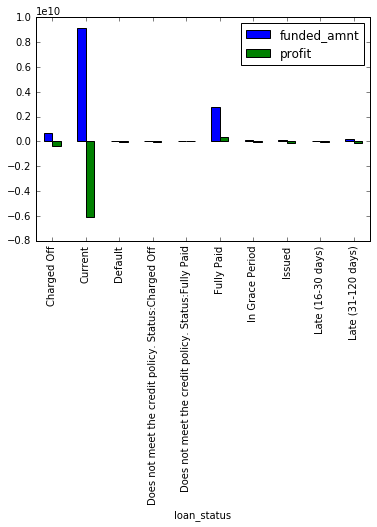

In [21]:
df.groupby('loan_status').sum()[['funded_amnt','profit']].plot.bar()

In [22]:
sum(df[df.loan_status!='Current']['profit'])

-303772309.34248954

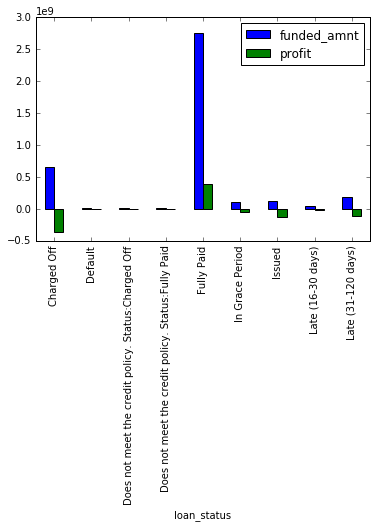

In [23]:
df[df.loan_status!='Current'].groupby('loan_status').sum()[['funded_amnt','profit']].plot.bar()

only get out 'charged off' and 'fully paid'

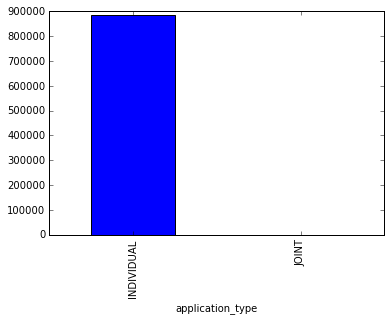

In [24]:
df.groupby('application_type').count()['id'].plot.bar()

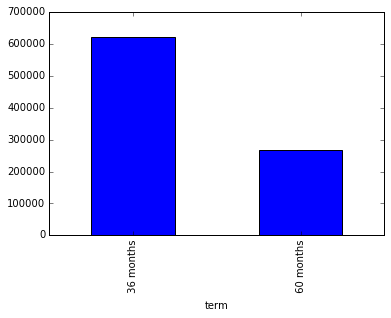

In [25]:
df.groupby('term').count()['id'].plot.bar()

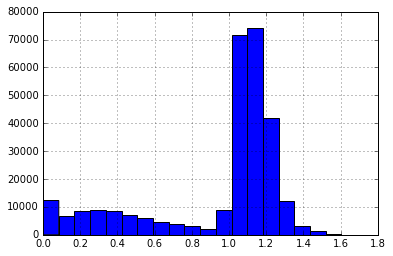

In [26]:
df[df.loan_status!='Current']['paid_per'].hist(bins = 20)

### Company profile

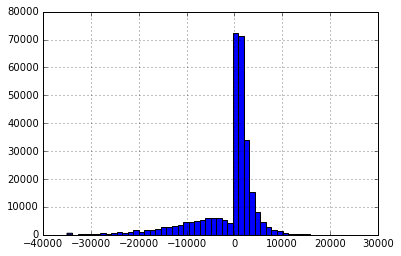

In [27]:
df[df.loan_status!='Current'].profit.hist(bins=50)

In [28]:
df['issue_y'].describe()

count     887379
unique         9
top         2015
freq      421094
Name: issue_y, dtype: object

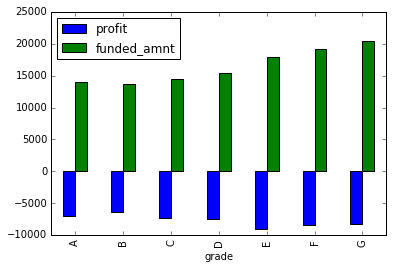

In [29]:
df.groupby('grade').mean()[['profit', 'funded_amnt']].plot.bar()

In [30]:
# Percentage loan collected by grade

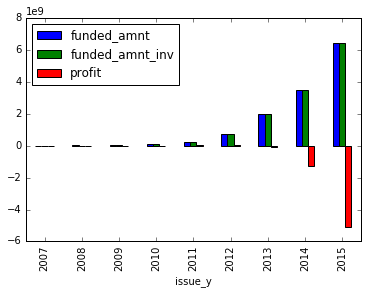

In [31]:
# Development of profitability through year
df.groupby('issue_y').sum()[['funded_amnt', 'funded_amnt_inv', 'profit']].plot.bar()

Problem started from 2013, from 2014 there is large negative profit

### A look by grade

In [32]:
df.groupby('grade').mean()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,profit,paid_per
grade,,,,,,,,,,,,,,,,,,,,,
A,33120857,35667862,14038.860306,14023.323572,14000.506187,7.243312,427.599175,86942.651653,15.577401,0.185855,...,1.027260,2.334143,7072.432659,49.404966,47014.290774,0.633198,1.551417,0.967341,-6955.039480,0.531405
B,31633490,34127959,13642.965211,13630.195062,13594.642917,10.829618,408.439291,75487.389207,17.305115,0.308154,...,1.243783,2.756522,5936.938825,59.140656,32701.382733,0.778795,1.434935,1.592067,-6364.152117,0.561261
C,33431341,36036201,14466.306028,14458.230599,14423.251934,13.980098,421.942081,71536.950300,18.792559,0.349268,...,1.474073,3.120244,5664.896613,64.175068,28450.268219,1.029860,1.541821,2.204848,-7282.825179,0.520708
D,31611873,34108160,15459.506278,15450.499670,15405.780441,17.175814,455.570227,69169.272616,19.908175,0.361815,...,1.655491,3.411563,5300.444749,66.918064,26206.514839,1.189189,1.650359,2.741020,-7528.106408,0.546131
E,33533336,36115301,17998.146171,17970.831978,17907.977084,19.897322,514.993641,72119.152229,20.338847,0.365156,...,1.808172,3.713989,5188.916205,67.777839,26849.450016,1.380886,1.701524,3.144737,-9108.378959,0.510134
F,29935851,32308125,19139.160809,19098.808904,19005.420917,23.582787,565.654337,73801.170917,19.834316,0.370607,...,2.093458,4.056075,4926.726636,70.020561,25489.949626,1.595794,1.630841,3.696262,-8380.595122,0.573809
G,28598972,30896095,20538.563491,20497.959555,20296.247792,25.626706,627.054815,79904.591762,19.182093,0.424303,...,2.272727,4.181818,3825.352273,70.452273,25553.756678,1.761364,1.284091,4.204545,-8243.539554,0.593060


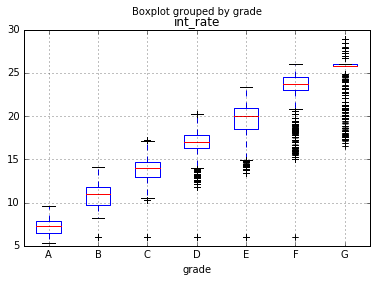

In [33]:
# Interest rate assigned to each grade
df.boxplot(column='int_rate', by='grade')

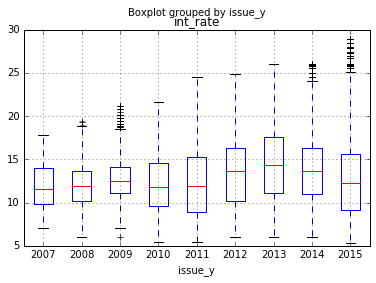

In [34]:
df.boxplot(column='int_rate', by='issue_y')

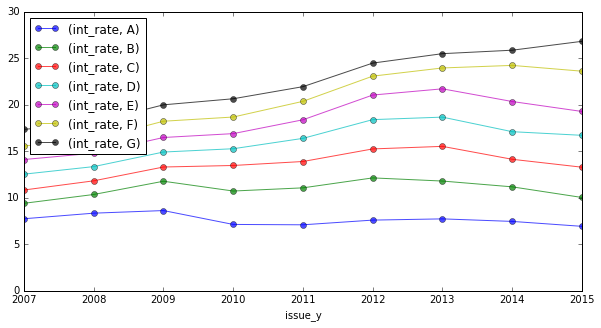

In [35]:
ax = pd.pivot_table(df, values=['int_rate'], 
               index = ['issue_y'], columns=['grade'], aggfunc=np.mean).plot(style = 'o-',
               alpha=0.7, ylim=[0,30], figsize=(10,5), legend=False)
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')

### Customer profile

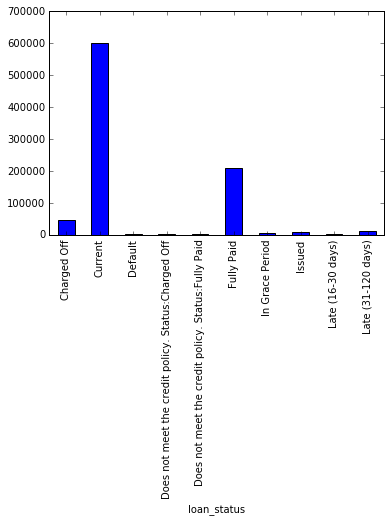

In [36]:
df.groupby('loan_status').count()['id'].plot.bar()

(<matplotlib.axes._subplots.AxesSubplot at 0x120623790>,
 <matplotlib.axes._subplots.AxesSubplot at 0x121ab0a90>)

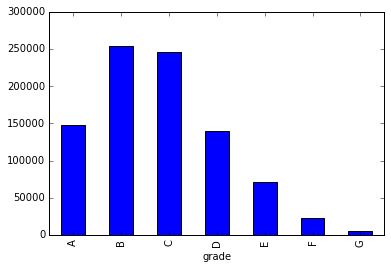

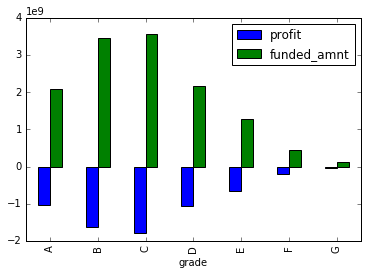

In [37]:
# The number of people in each grade and the payback for each grade
df.groupby('grade').count()['id'].plot.bar(), df.groupby('grade').sum()[['profit', 'funded_amnt']].plot.bar()

In [38]:
dt=df[df.loan_status.isin(['Fully Paid','Charged Off'])]

### find params that are statistically different

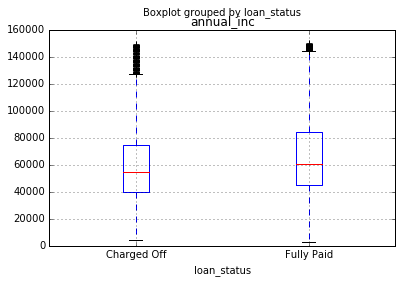

In [39]:
dt[dt.annual_inc<150000].boxplot(column='annual_inc', by='loan_status')

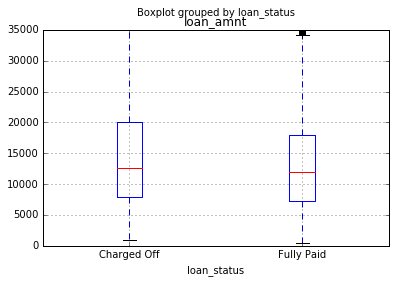

In [40]:
dt.boxplot(column='loan_amnt', by='loan_status')

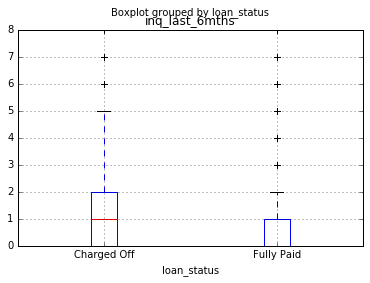

In [41]:
dt.boxplot(column='inq_last_6mths', by='loan_status')

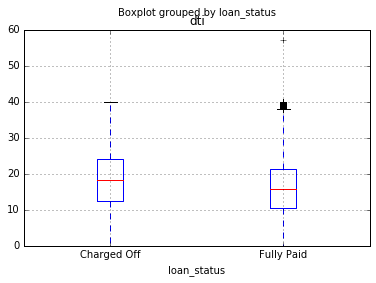

In [42]:
dt.boxplot(column='dti', by='loan_status')

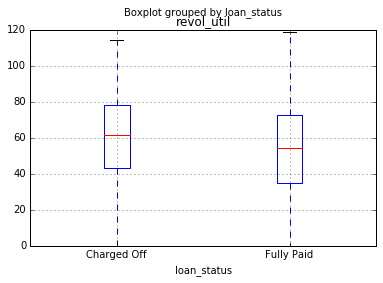

In [43]:
dt[dt.revol_util<120].boxplot(column='revol_util', by='loan_status')

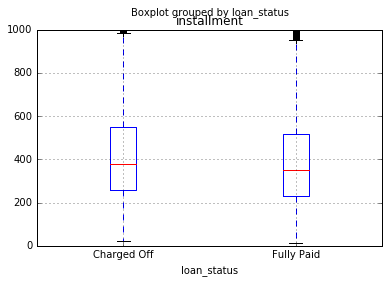

In [44]:
dt[dt.installment<1000].boxplot(column='installment', by='loan_status')

In [45]:
dt.groupby('loan_status').describe()

acc_now_delinq    all_util    annual_inc  annual_inc_joint  \
loan_status                                                                     
Charged Off count    45248.000000    0.000000  4.524800e+04               0.0   
            mean         0.003912         NaN  6.508513e+04               NaN   
            std          0.070722         NaN  5.697144e+04               NaN   
            min          0.000000         NaN  4.080000e+03               NaN   
            25%          0.000000         NaN  4.000000e+04               NaN   
            50%          0.000000         NaN  5.600000e+04               NaN   
            75%          0.000000         NaN  7.800000e+04               NaN   
            max          5.000000         NaN  8.706582e+06               NaN   
Fully Paid  count   207723.000000  144.000000  2.077230e+05               1.0   
            mean         0.002941   58.945139  7.416175e+04           36000.0   
            std          0.058101   20.356957  5.908066e+04               NaN   
            min          0.000000    7.900000  3.000000e+03           36000.0   
            25%          0.000000         NaN  4.500000e+04               NaN   
            50%          0.000000         NaN  6.416200e+04               NaN   
            75%          0.000000         NaN  9.000000e+04               NaN   
            max          5.000000  102.800000  7.141778e+06           36000.0   

                   collection_recovery_fee  collections_12_mths_ex_med  \
loan_status                                                              
Charged Off count             45248.000000                45242.000000   
            mean                 93.663741                    0.008068   
            std                 256.002276                    0.094972   
            min                   0.000000                    0.000000   
            25%                   0.000000                         NaN   
            50%                   1.070000                         NaN   
            75%                  26.640550                         NaN   
            max                7002.190000                    4.000000   
Fully Paid  count            207723.000000               207673.000000   
            mean                  0.000000                    0.006433   
            std                   0.000000                    0.087649   
            min                   0.000000                    0.000000   
            25%                   0.000000                         NaN   
            50%                   0.000000                         NaN   
            75%                   0.000000                         NaN   
            max                   0.000000                    6.000000   

                     delinq_2yrs            dti  dti_joint    funded_amnt  \
loan_status                                                                 
Charged Off count   45248.000000   45248.000000        0.0   45248.000000   
            mean        0.276056      18.403126        NaN   14510.749094   
            std         0.791679       7.939290        NaN    8366.823080   
            min         0.000000       0.000000        NaN     900.000000   
            25%         0.000000      12.570000        NaN    8000.000000   
            50%         0.000000      18.350000        NaN   12600.000000   
            75%         0.000000      24.092500        NaN   20000.000000   
            max        18.000000      39.980000        NaN   35000.000000   
Fully Paid  count  207723.000000  207723.000000        1.0  207723.000000   
            mean        0.244219      16.139156       17.6   13306.858172   
            std         0.728877       7.696190        NaN    8035.909683   
            min         0.000000       0.000000       17.6     500.000000   
            25%         0.000000      10.420000        NaN    7150.000000   
            50%         0.000000      15.750000        NaN   12000.00000

### Model for interest assignment

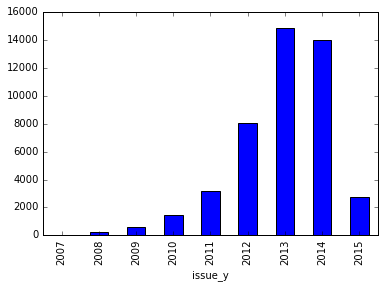

In [46]:
# Charged off customers are growing
dt[dt.loan_status=='Charged Off'].groupby('issue_y').count()['id'].plot.bar()

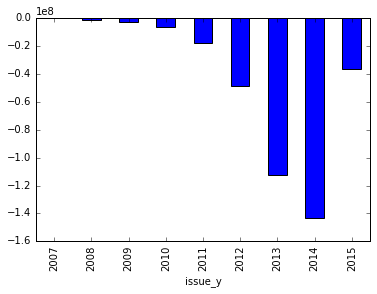

In [47]:
# Charged off amount are growing
dt[dt.loan_status=='Charged Off'].groupby('issue_y').sum()['profit'].plot.bar()

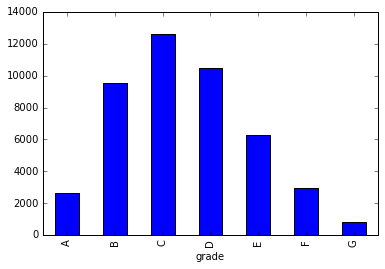

In [48]:
# #charged off customer vs. grade
df[df.loan_status=='Charged Off'].groupby('grade').count()['id'].plot.bar()

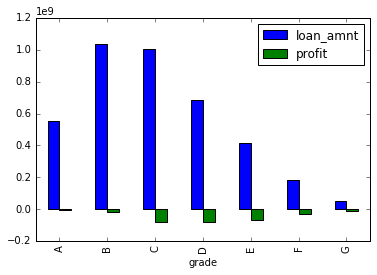

In [49]:
df[df.loan_status!='Current'].groupby('grade').sum()[['loan_amnt','profit']].plot.bar()

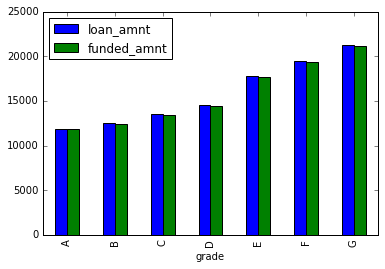

In [50]:
df[df.loan_status=='Charged Off'].groupby('grade').mean()[['loan_amnt', 'funded_amnt']].plot.bar()

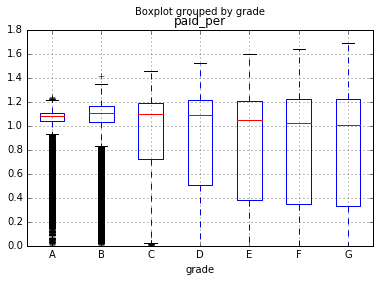

In [51]:
df[df.loan_status!='Current'].boxplot(column='paid_per', by='grade')

In [52]:
# Features
cat_features = ['emp_length', 'home_ownership', 'addr_state', 'policy_code', 'grade', 'issue_y', 'zip_code', 'url']
#num_features = ['loan_amnt', 'int_rate', 'inq_last_6mths',  'inq_fi', 'dti', 'open_acc', 'acc_now_delinq']
num_features = [x for x in num_fea if x not in ['id', 'member_id', 'profit', 
                'last_pymnt_amnt', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
                'collection_recovery_fee', 'recoveries', 'total_rec_late_fee', 'total_rec_int',
                'int_rate']]

In [53]:
num_features

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'annual_inc_joint',
 'dti_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

In [54]:
# Encode cat_features to numerical
for label in cat_features: 
    le = preprocessing.LabelEncoder()
    dt[label] = le.fit_transform(dt[label])

/Users/adonismaomao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [55]:
# Prediction target
X = dt[cat_features+num_features]

#X_cat = pd.get_dummies(dt[cat_features])
#X = pd.concat([X_cat, dt[num_features]], axis=1)

X = X.fillna(0)

In [56]:
X.head()

,emp_length,home_ownership,addr_state,policy_code,grade,issue_y,zip_code,url,loan_amnt,funded_amnt,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1,5,3,0,1,4,766,11295,5000.0,5000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10,5,10,0,2,4,288,11278,2500.0,2500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,5,14,0,2,4,544,11264,2400.0,2400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,5,4,0,2,4,806,11244,10000.0,10000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3,5,3,0,0,4,759,10996,5000.0,5000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
y = dt['loan_status'].apply(lambda x: 1.0 if x =='Fully Paid' else 0)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("Training length: " +str(len(y_train)))
print("Test length: " +str(len(y_test)))

Training length: 189728
Test length: 63243


In [59]:
clf = RandomForestClassifier(n_estimators=500, max_features=5, min_samples_leaf=10, 
                            class_weight="balanced", n_jobs=-1, oob_score=True, verbose=True,
                            random_state=0)

In [60]:
%time
clf.fit(X_train, y_train)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.8min finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=5,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=True, random_state=0,
            verbose=True, warm_start=False)

In [61]:
clf.score(X_train, y_train)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    8.4s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    9.5s finished


0.89255671276775173

In [62]:
clf.score(X_test, y_test)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    3.4s finished


0.76713628385750199

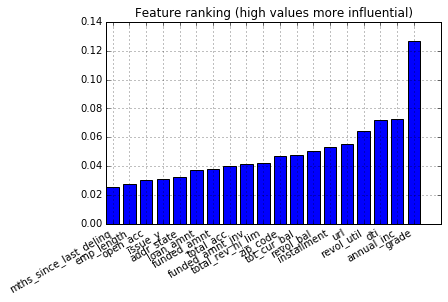

In [63]:
X_names = X.columns.tolist()

imp = clf.feature_importances_
sortNames = [y for (x,y) in sorted(zip(imp,X_names)) if x >0.02]
sortImp = [x for (x,y) in sorted(zip(imp,X_names)) if x >0.02]

fig = plt.figure()
ind = np.arange(len(sortImp))
width = .75
plt.bar(ind, sortImp, width=width)
plt.xticks(ind + width / 2, sortNames)
fig.autofmt_xdate()
plt.grid(True)
plt.title('Feature ranking (high values more influential)')
plt.show()

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    3.5s finished


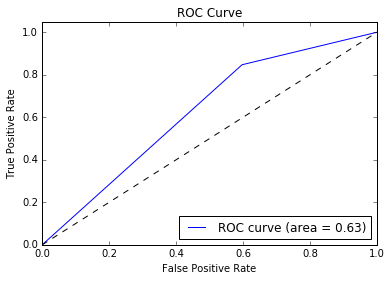

[[ 4588  6797]
 [ 7930 43928]]


In [64]:
#validation
os_truth = y_test
os_y_hat = clf.predict(X_test)

fpr, tpr, _ = metrics.roc_curve(y_test, os_y_hat)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

cm = confusion_matrix(os_truth, os_y_hat)
print(cm)